**Finding the right Super Neighborhood for a New italian Restaurant in Houston, TX**
___

**First, I will import libraries**

In [1]:
import pandas as pd
import numpy as np
import json 
!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import requests
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!pip install geocoder
import geocoder
import random
from pandas.io.json import json_normalize
from IPython.display import Image 
from IPython.core.display import HTML 
!pip install Shapely
import shapely
from shapely.geometry import Point, Polygon
from shapely import geometry
!pip install geojson
from geojson import Point
print('Libraries imported.')

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.

Libraries imported.


**Let's import the geojson file for the Houston Super Neighborhoods**

In [2]:
COH_geo = r'COH_SUPER_NEIGHBORHOODS.geojson'

**Now let's make a dataframe out of the Super Neighborhoods**

In [3]:
with open('COH_SUPER_NEIGHBORHOODS.geojson') as json_data:
    houston_data = json.load(json_data)

**with, the JSON loaded we can select the Neighborhoods by 'type"**
*Notice the coordinates are for a multi-polygon*

In [4]:
neighborhoods_data = houston_data['features']
neighborhoods_data[0]

{'type': 'Feature',
 'properties': {'OBJECTID': 1,
  'PERIMETER': 16572.025,
  'POLYID': 60,
  'SNBNAME': 'FOURTH WARD',
  'GLOBALID': '{EDCA8617-F41A-4E57-8138-02BFCD50E562}',
  'cohgis.COHGIS.SNBR.AREA': 0,
  'cohgis.COHGIS.SNBR.LEN': 0,
  'COUNCIL_ACTIVE': None,
  'RECOGNITION_DATE': None,
  'SnbrInfoURL': 'http://www.houstontx.gov/superneighborhoods/60.html',
  'WeCan': 'Y',
  'Top10': None,
  'CEA_FLAG': 'N',
  'Shape.area': 12969824.766338602,
  'Shape.len': 16572.0260242156},
 'geometry': {'type': 'Polygon',
  'coordinates': [[[-95.3858120191703, 29.76157948522655],
    [-95.3857510351169, 29.759096134455724],
    [-95.38575701432947, 29.7589274318535],
    [-95.38581341906735, 29.75809220348262],
    [-95.38571553175525, 29.757628886192457],
    [-95.38567397795319, 29.753574178823797],
    [-95.38575841615513, 29.753438202654888],
    [-95.3857221276755, 29.750280400839365],
    [-95.38400247507784, 29.750315844530196],
    [-95.38376001290212, 29.750262353841276],
    [-95.38

**Now, we can create a blank DataFrame for the Neighborhoods**

In [5]:
# define the dataframe columns
column_names = ['Neighborhood', 'Radius'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)
neighborhoods

,Neighborhood,Radius


**Now let's create a loop to cycle through the geojson and fill our blank DataFrame with all of the Neighborhoods**

In [6]:
for houston_data in neighborhoods_data:
    neighborhood_name = houston_data['properties']['SNBNAME']
    neighborhood_length = (houston_data['properties']['Shape.len'])/2
    neighborhoods = neighborhoods.append({'Neighborhood': neighborhood_name,
                                          'Radius': neighborhood_length}, ignore_index=True)

In [7]:
neighborhoods  #Displaying the df to inspect the data

,Neighborhood,Radius
0,FOURTH WARD,8286.013012
1,SECOND WARD,21559.385008
2,DOWNTOWN,19628.193746
3,CLINTON PARK TRI-COMMUNITY,29892.348864
4,GREATER UPTOWN,37879.695071
...,...,...
83,BRIAR FOREST,31872.649940
84,NEARTOWN - MONTROSE,19368.664533
85,MEMORIAL,65895.708915
86,SPRING BRANCH WEST,48281.178774


In [8]:
Houston_latlng = pd.read_csv('coh_latlng1.csv')
Houston_latlng.head()

,Neighborhood,Latitude,Longitude
0,ACRES HOME,29.866379,-95.425244
1,ADDICKS PARK TEN,29.816267,-95.629037
2,AFTON OAKS / RIVER OAKS AREA,29.749073,-95.433273
3,ALIEF,29.685786,-95.585024
4,ASTRODOME AREA,29.688324,-95.393527


In [9]:
COH_geo = pd.merge(left=neighborhoods, right=Houston_latlng, how='left', left_on='Neighborhood', right_on='Neighborhood')
COH_geo

,Neighborhood,Radius,Latitude,Longitude
0,FOURTH WARD,8286.013012,29.757069,-95.381041
1,SECOND WARD,21559.385008,29.748903,-95.326587
2,DOWNTOWN,19628.193746,29.757909,-95.359908
3,CLINTON PARK TRI-COMMUNITY,29892.348864,29.746502,-95.261514
4,GREATER UPTOWN,37879.695071,29.756976,-95.476021
...,...,...,...,...
83,BRIAR FOREST,31872.649940,29.749553,-95.576704
84,NEARTOWN - MONTROSE,19368.664533,29.746464,-95.397493
85,MEMORIAL,65895.708915,29.776848,-95.584158
86,SPRING BRANCH WEST,48281.178774,29.797323,-95.552021


In [10]:
print("the average radius is", COH_geo["Radius"].mean())
print("the smallest radius is", COH_geo["Radius"].min())

the average radius is 35375.32067951341
the smallest radius is 8286.0130121078


**Before I can querey the Foursquare API, I need to create some vairables first**
___
*First, I will import my Foursquare credentials*

In [11]:
CLIENT_ID = 'ELNBL3SFKZ4M3YAMKTQRUJ2TTYLE5PKJR4TBDZKV5ZNKQDAY' # your Foursquare ID
CLIENT_SECRET = 'LK00OOTPYWAHMQM0J2B11MZRAD5TGJC0HFRZ101COK4WUMAA' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ELNBL3SFKZ4M3YAMKTQRUJ2TTYLE5PKJR4TBDZKV5ZNKQDAY
CLIENT_SECRET:LK00OOTPYWAHMQM0J2B11MZRAD5TGJC0HFRZ101COK4WUMAA


In [12]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

**Now I will create a function to allow me to loop through quereying all of the Super Neighborhoods in Houston based off of their lat/lon and radius values**
___

In [13]:
def getNearbyVenues(names, latitudes, longitudes, radius=8000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

**Now I will querey the Foursquare API using the above defined function to querey all of the Houston Super Neighborhoods**
___

In [15]:
LIMIT = 2500
Houston_venues = getNearbyVenues(names=COH_geo['Neighborhood'],
                                 latitudes=COH_geo['Latitude'],
                                 longitudes=COH_geo['Longitude']
                                )

FOURTH WARD
SECOND WARD
DOWNTOWN
CLINTON PARK TRI-COMMUNITY
GREATER UPTOWN
GREATER INWOOD
GREATER HOBBY AREA
GOLFCREST / BELLFORT / REVEILLE
ELDRIDGE / WEST OAKS
WASHINGTON AVENUE COALITION / MEMORIAL PARK
GREATER FIFTH WARD
DENVER HARBOR / PORT HOUSTON
PLEASANTVILLE AREA
NORTHSHORE
LAZYBROOK / TIMBERGROVE
GREATER HEIGHTS
KASHMERE GARDENS
MINNETEX
NEAR NORTHSIDE
SPRING BRANCH EAST
SPRING BRANCH NORTH
EL DORADO / OATES PRAIRIE
SPRING BRANCH CENTRAL
HUNTERWOOD
SETTEGAST
LANGWOOD
INDEPENDENCE HEIGHTS
CENTRAL NORTHWEST
TRINITY / HOUSTON GARDENS
CARVERDALE
EASTEX - JENSEN AREA
EAST HOUSTON
ACRES HOME
NORTHSIDE/NORTHLINE
HIDDEN VALLEY
EAST LITTLE YORK / HOMESTEAD
WILLOWBROOK
GREATER GREENSPOINT
IAH / AIRPORT AREA
KINGWOOD AREA
LAKE HOUSTON
FAIRBANKS / NORTHWEST CROSSING
WESTBRANCH
SHARPSTOWN
WESTWOOD
FORT BEND HOUSTON
FONDREN GARDENS
SOUTH BELT / ELLINGTON
SOUTH ACRES / CRESTMONT PARK
BRAYS OAKS
CENTRAL SOUTHWEST
SUNNYSIDE
ALIEF
PECAN PARK
CLEAR LAKE
WESTBURY
WILLOW MEADOWS / WILLOWBEND AREA

In [16]:
print(Houston_venues.shape)
Houston_venues.head()

(8756, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,FOURTH WARD,29.757069,-95.381041,Eleanor Tinsley Park,29.761440,-95.379271,Park
1,FOURTH WARD,29.757069,-95.381041,Buffalo Bayou Walk,29.762177,-95.375844,Trail
2,FOURTH WARD,29.757069,-95.381041,"Spec's Wines, Spirits & Finer Foods",29.748694,-95.376949,Liquor Store
3,FOURTH WARD,29.757069,-95.381041,Buffalo Bayou Park,29.762068,-95.391626,Park
4,FOURTH WARD,29.757069,-95.381041,Tellepsen Family Downtown YMCA,29.752068,-95.370679,Gym


In [17]:
Houston_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ACRES HOME,100,100,100,100,100,100
ADDICKS PARK TEN,100,100,100,100,100,100
AFTON OAKS / RIVER OAKS AREA,100,100,100,100,100,100
ALIEF,100,100,100,100,100,100
ASTRODOME AREA,100,100,100,100,100,100
...,...,...,...,...,...,...
WESTBURY,100,100,100,100,100,100
WESTCHASE,100,100,100,100,100,100
WESTWOOD,100,100,100,100,100,100


In [18]:
print('There are {} uniques categories.'.format(len(Houston_venues['Venue Category'].unique())))

There are 251 uniques categories.


**Modifying the data for charts and adding values for counts of venue by type to each neighborhood**
___

In [19]:
Houston_venues = pd.read_pickle('venues.pkl')

In [20]:
Italian = Houston_venues[Houston_venues['Venue Category'] == "Italian Restaurant"]
Italian_restaurants = pd.DataFrame(Italian['Neighborhood'].value_counts())
Italian_restaurants.reset_index(level=0, inplace=True)
Italian_restaurants.rename(columns = {'Neighborhood':'Italian', 'index':'Neighborhood'}, inplace = True)
COH_metrics = pd.merge(left=COH_geo, right=Italian_restaurants, how='left', left_on='Neighborhood', right_on='Neighborhood')
COH_metrics['Italian'].replace(np.nan, "0", inplace = True)
COH_metrics['Italian'] = pd.to_numeric(COH_metrics['Italian']).astype(int)

In [21]:
temp_x = Houston_venues[Houston_venues['Venue Category'].str.contains('taurant', na=False)]
temp_x.dropna(subset=["Venue Category"], axis=0, inplace=True)
Other_restaurants = pd.DataFrame(temp_x['Neighborhood'].value_counts())
Other_restaurants.reset_index(level=0, inplace=True)
Other_restaurants.rename(columns = {'Neighborhood':'Other Restaurants', 'index':'Neighborhood'}, inplace = True)
COH_metrics = pd.merge(left=COH_metrics, right=Other_restaurants, how='left', left_on='Neighborhood', right_on='Neighborhood')
COH_metrics['Other Restaurants'].replace(np.nan, "0", inplace = True)

D:\CONDA\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
Houston_venues = pd.read_pickle('venues.pkl')
temp_h = Houston_venues
temp_h.drop(temp_h[temp_h['Venue Category'].str.contains('taurant')].index, inplace = True)
Other_venues = pd.DataFrame(temp_h['Neighborhood'].value_counts())
Other_venues.reset_index(level=0, inplace=True)
Other_venues.rename(columns = {'Neighborhood':'Other Venues', 'index':'Neighborhood'}, inplace = True)
COH_metrics = pd.merge(left=COH_metrics, right=Other_venues, how='left', left_on='Neighborhood', right_on='Neighborhood')
column_list = list(COH_metrics)
column_list.remove("Neighborhood")
column_list.remove("Radius")
column_list.remove("Longitude")
column_list.remove("Latitude")
COH_metrics["sum"] = COH_metrics[column_list].sum(axis=1)
COH_metrics["Italian percent"] = (COH_metrics['Italian']/COH_metrics['sum'])*100
COH_metrics = COH_metrics.sort_values(by=['Italian percent'])
COH_metrics.reset_index(drop=True, inplace=True)
COH_metrics.head()

,Neighborhood,Radius,Latitude,Longitude,Italian,Other Restaurants,Other Venues,sum,Italian percent
0,SHARPSTOWN,36446.593566,29.705312,-95.523939,0,39,61,100,0.0
1,HIDDEN VALLEY,14051.150215,29.892646,-95.407223,0,22,78,100,0.0
2,EAST LITTLE YORK / HOMESTEAD,41673.714942,29.868208,-95.299438,0,16,72,88,0.0
3,WESTWOOD,19142.633543,29.676086,-95.549725,0,44,56,100,0.0
4,FORT BEND HOUSTON,40542.705152,29.596081,-95.487533,0,14,86,100,0.0


In [23]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


**let's check what the effects of the number of Other Restaurants and Other Venues have on the number of Italian Restaurants**

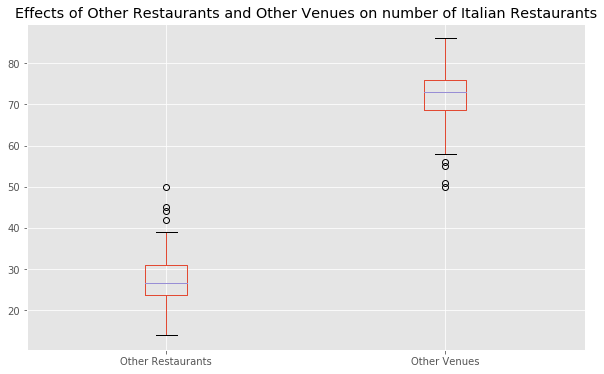

In [24]:
box_chart2 = COH_metrics
box_chart2 = box_chart2.drop(columns=['Radius', 'Latitude', "Longitude", "sum", "Italian percent"])
box_chart2.reset_index(drop=True, inplace=True)
box_chart2.set_index('Italian', inplace=True)
box_chart2.plot(kind='box', figsize=(10, 6))
plt.title('Effects of Other Restaurants and Other Venues on number of Italian Restaurants')
plt.show()

**We can see that 40 Super Neighborhoods in Houston do not have any Italian Restaurants**

In [32]:
Italian0_COH = COH_metrics[COH_metrics['Italian'] == 0]
Italian0_COH.reset_index(drop=True, inplace=True)
print(Italian0_COH.shape)
Bar_chart0 = Italian0_COH
Bar_chart0 = Bar_chart0.drop(columns=['Radius', 'Latitude', "Longitude", "sum", "Italian percent"])
Bar_chart0.reset_index(drop=True, inplace=True)
Bar_chart0.set_index('Neighborhood', inplace=True)
Italian0_COH.head()

(40, 9)


,Neighborhood,Radius,Latitude,Longitude,Italian,Other Restaurants,Other Venues,sum,Italian percent
0,SHARPSTOWN,36446.593566,29.705312,-95.523939,0,39,61,100,0.0
1,HIDDEN VALLEY,14051.150215,29.892646,-95.407223,0,22,78,100,0.0
2,EAST LITTLE YORK / HOMESTEAD,41673.714942,29.868208,-95.299438,0,16,72,88,0.0
3,WESTWOOD,19142.633543,29.676086,-95.549725,0,44,56,100,0.0
4,FORT BEND HOUSTON,40542.705152,29.596081,-95.487533,0,14,86,100,0.0


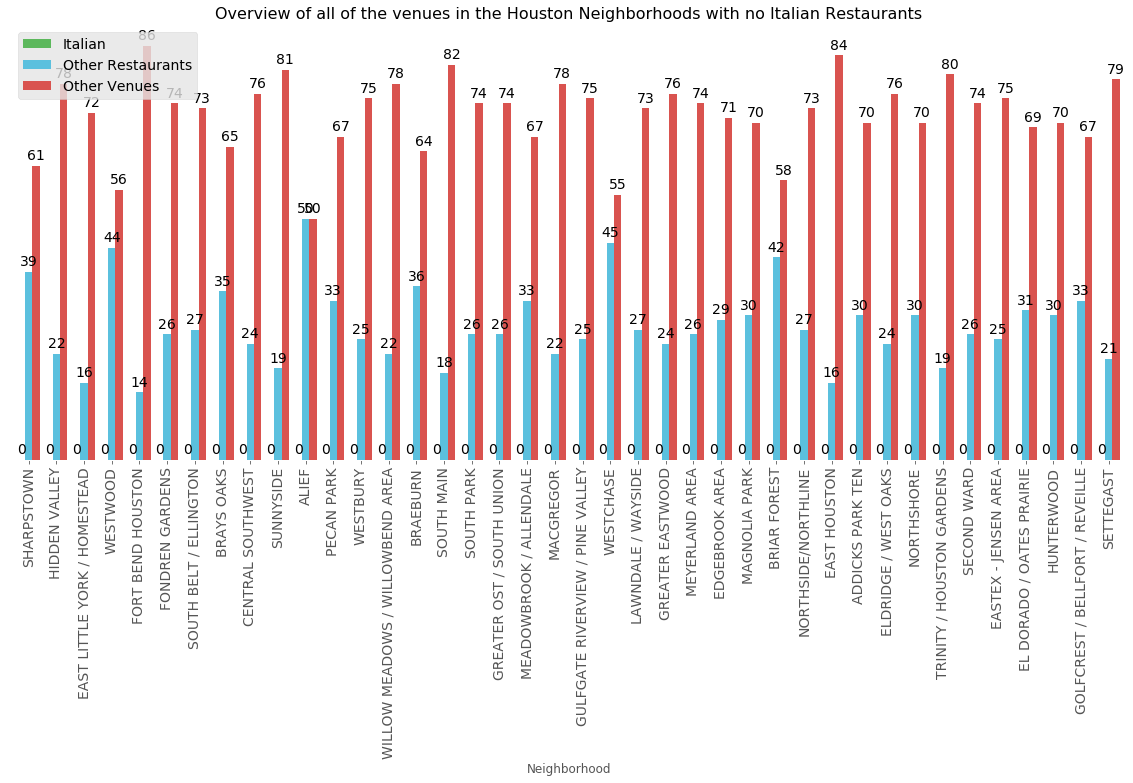

In [33]:
ax = Bar_chart0.plot(kind='bar', figsize = (20,8), width = 0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize = 14)
plt.legend(labels=Bar_chart0.columns,fontsize= 14)
plt.title("Overview of all of the venues in the Houston Neighborhoods with no Italian Restaurants",fontsize= 16)
ax.set_facecolor((1.0, 1.0, 1.0))
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )

plt.show()

**We can see that 23 Super Neighborhoods in Houston have only one Italian Restaurant, limiting our search to neighborhoods that only have one Italian restuarant will help determine which Neighborhoods have an Interest in Italian Cusine and versus Neighborhoods with no Italian Resturants**

In [27]:
Italian_COH = COH_metrics[COH_metrics['Italian'] == 1]
Italian_COH.reset_index(drop=True, inplace=True)
print(Italian_COH.shape)
Bar_chart = Italian_COH
Bar_chart = Bar_chart.drop(columns=['Radius', 'Latitude', "Longitude", "sum", "Italian percent"])
Bar_chart.reset_index(drop=True, inplace=True)
Bar_chart.set_index('Neighborhood', inplace=True)
Italian_COH.head()

(23, 9)


,Neighborhood,Radius,Latitude,Longitude,Italian,Other Restaurants,Other Venues,sum,Italian percent
0,DENVER HARBOR / PORT HOUSTON,40439.757488,29.772576,-95.298285,1,25,75,101,0.990099
1,PARK PLACE,20506.341320,29.697207,-95.272003,1,31,69,101,0.990099
2,GREATER FIFTH WARD,27596.077729,29.775798,-95.328829,1,23,77,101,0.990099
3,CARVERDALE,28088.159996,29.855771,-95.548545,1,37,63,101,0.990099
4,KASHMERE GARDENS,26176.020645,29.801943,-95.320831,1,27,73,101,0.990099


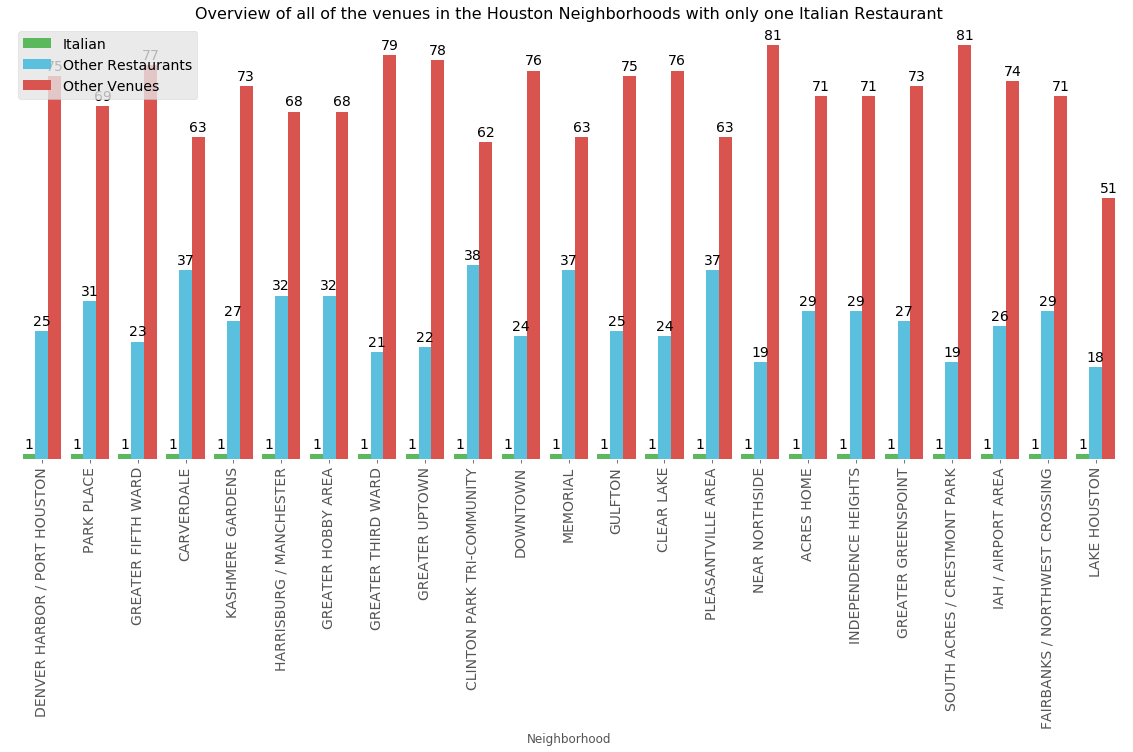

In [28]:
ax = Bar_chart.plot(kind='bar', figsize = (20,8), width = 0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize = 14)
plt.legend(labels=Bar_chart.columns,fontsize= 14)
plt.title("Overview of all of the venues in the Houston Neighborhoods with only one Italian Restaurant",fontsize= 16)
ax.set_facecolor((1.0, 1.0, 1.0))
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )

plt.show()

**We can see that 25 Super Neighborhoods in Houston have Greater than 2 Italian Restaurants**

In [29]:
Italian_COH1 = COH_metrics[COH_metrics['Italian'] >= 2]
Italian_COH1.reset_index(drop=True, inplace=True)
print(Italian_COH1.shape)
Bar_chart1 = Italian_COH1
Bar_chart1 = Bar_chart1.drop(columns=['Radius', 'Latitude', "Longitude", "sum", "Italian percent"])
Bar_chart1.reset_index(drop=True, inplace=True)
Bar_chart1.set_index('Neighborhood', inplace=True)
Italian_COH1.head()

(25, 9)


,Neighborhood,Radius,Latitude,Longitude,Italian,Other Restaurants,Other Venues,sum,Italian percent
0,CENTRAL NORTHWEST,41925.603578,29.828763,-95.444862,2,27,73,102,1.960784
1,BRAESWOOD,20043.380925,29.692534,-95.431955,2,23,77,102,1.960784
2,MIDTOWN,13764.248611,29.741398,-95.374541,2,22,78,102,1.960784
3,GREATER INWOOD,56834.519261,29.867343,-95.477039,2,24,76,102,1.960784
4,MID WEST,35099.216395,29.731516,-95.509366,2,28,72,102,1.960784


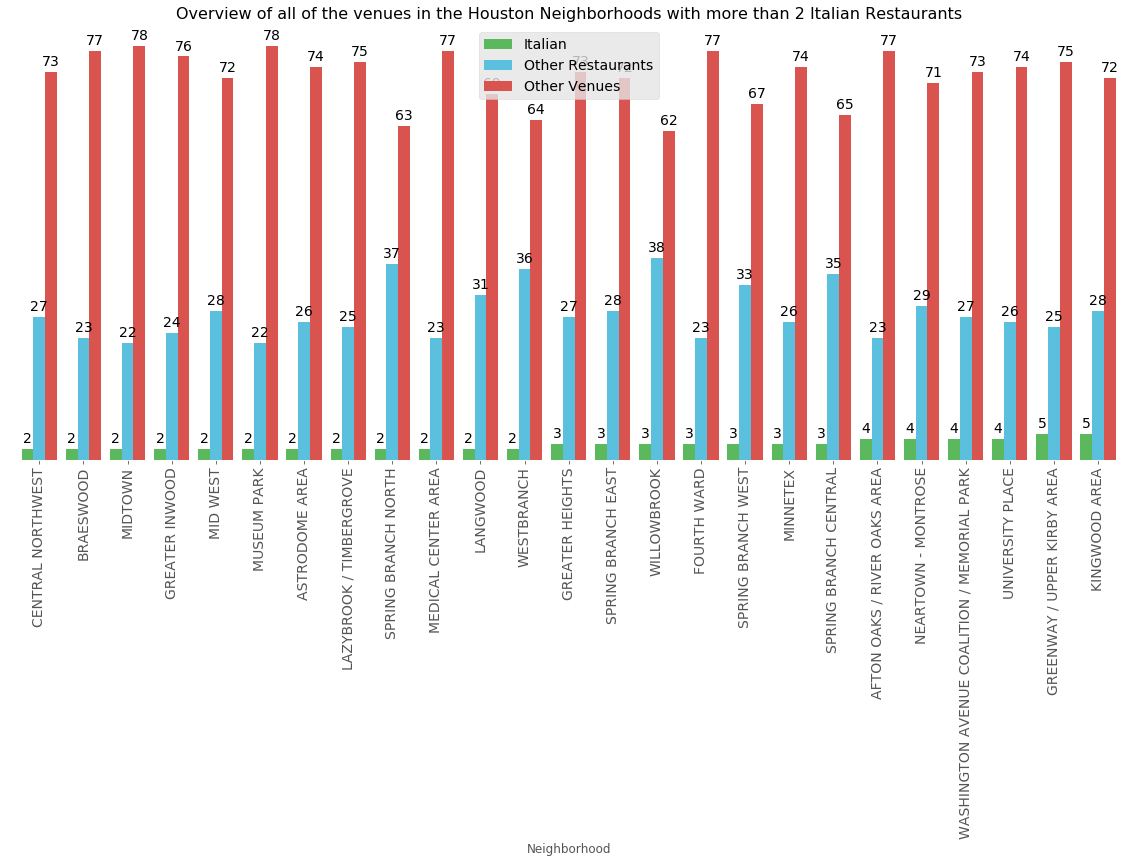

In [30]:
ax = Bar_chart1.plot(kind='bar', figsize = (20,8), width = 0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize = 14)
plt.legend(labels=Bar_chart1.columns,fontsize= 14)
plt.title("Overview of all of the venues in the Houston Neighborhoods with more than 2 Italian Restaurants",fontsize= 16)
ax.set_facecolor((1.0, 1.0, 1.0))
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )

plt.show()

**One Hot encoding**
___

In [34]:
Houston_venues = pd.read_pickle('venues.pkl')
Houston_onehot = pd.get_dummies(Houston_venues[['Venue Category']], prefix="", prefix_sep="")
Houston_onehot['Neighborhood'] = Houston_venues['Neighborhood'] 
fixed_columns = [Houston_onehot.columns[-1]] + list(Houston_onehot.columns[:-1])
Houston_onehot = Houston_onehot[fixed_columns]
Houston_onehot.head()

,Neighborhood,Accessories Store,Advertising Agency,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,FOURTH WARD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,FOURTH WARD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,FOURTH WARD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,FOURTH WARD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,FOURTH WARD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
Houston_onehot.shape

(8756, 252)

In [36]:
Houston_grouped = Houston_onehot.groupby('Neighborhood').mean().reset_index()
Houston_grouped

,Neighborhood,Accessories Store,Advertising Agency,African Restaurant,Airport Lounge,Airport Service,American Restaurant,Antique Shop,Arcade,Art Gallery,...,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio,Zoo,Zoo Exhibit
0,ACRES HOME,0.00,0.0,0.00,0.0,0.0,0.02,0.0,0.0,0.00,...,0.01,0.0,0.01,0.00,0.02,0.00,0.00,0.01,0.00,0.00
1,ADDICKS PARK TEN,0.00,0.0,0.00,0.0,0.0,0.01,0.0,0.0,0.00,...,0.00,0.0,0.02,0.00,0.00,0.00,0.02,0.00,0.00,0.00
2,AFTON OAKS / RIVER OAKS AREA,0.00,0.0,0.00,0.0,0.0,0.01,0.0,0.0,0.00,...,0.00,0.0,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00
3,ALIEF,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,...,0.00,0.0,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,ASTRODOME AREA,0.00,0.0,0.00,0.0,0.0,0.02,0.0,0.0,0.01,...,0.00,0.0,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,WESTBURY,0.01,0.0,0.00,0.0,0.0,0.01,0.0,0.0,0.00,...,0.00,0.0,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00
84,WESTCHASE,0.00,0.0,0.00,0.0,0.0,0.03,0.0,0.0,0.00,...,0.00,0.0,0.03,0.00,0.00,0.01,0.00,0.00,0.00,0.00
85,WESTWOOD,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,...,0.00,0.0,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00
86,WILLOW MEADOWS / WILLOWBEND AREA,0.01,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.01,...,0.00,0.0,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.02


In [37]:
Houston_grouped.shape

(88, 252)

In [38]:
num_top_venues = 5

for hood in Houston_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Houston_grouped[Houston_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ACRES HOME----
                venue  freq
0  Mexican Restaurant  0.07
1  Seafood Restaurant  0.05
2         Coffee Shop  0.05
3        Burger Joint  0.04
4         Pizza Place  0.03


----ADDICKS PARK TEN----
                  venue  freq
0    Mexican Restaurant  0.07
1          Burger Joint  0.06
2                  Park  0.05
3  Fast Food Restaurant  0.04
4                 Hotel  0.03


----AFTON OAKS / RIVER OAKS AREA----
                     venue  freq
0            Grocery Store  0.07
1                    Trail  0.05
2                     Park  0.05
3       Italian Restaurant  0.04
4  New American Restaurant  0.04


----ALIEF----
                       venue  freq
0         Chinese Restaurant  0.08
1                     Bakery  0.05
2              Grocery Store  0.05
3  Cajun / Creole Restaurant  0.04
4            Bubble Tea Shop  0.04


----ASTRODOME AREA----
                 venue  freq
0                 Park  0.05
1        Grocery Store  0.05
2                Trail  0.04
3 

In [39]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [54]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Houston_grouped['Neighborhood']

for ind in np.arange(Houston_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Houston_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACRES HOME,Mexican Restaurant,Coffee Shop,Seafood Restaurant,Burger Joint,BBQ Joint,Taco Place,Fast Food Restaurant,Pizza Place,Beer Garden,Bakery
1,ADDICKS PARK TEN,Mexican Restaurant,Burger Joint,Park,Fast Food Restaurant,Hotel,Seafood Restaurant,Fried Chicken Joint,Sandwich Place,Café,Coffee Shop
2,AFTON OAKS / RIVER OAKS AREA,Grocery Store,Park,Trail,Italian Restaurant,New American Restaurant,Mexican Restaurant,Burger Joint,Café,Shopping Mall,Ice Cream Shop
3,ALIEF,Chinese Restaurant,Bakery,Grocery Store,Bubble Tea Shop,Asian Restaurant,Vietnamese Restaurant,Cajun / Creole Restaurant,Fast Food Restaurant,Korean Restaurant,Mexican Restaurant
4,ASTRODOME AREA,Park,Grocery Store,Trail,Coffee Shop,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,BBQ Joint


**Using K-means to cluster the Super Neighborhoods**
___

In [55]:
kclusters = 5
Houston_grouped_clustering = Houston_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Houston_grouped_clustering)
kmeans.labels_[0:10] 

array([0, 0, 3, 0, 3, 0, 3, 0, 0, 0])

In [56]:
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
Houston_merged = COH_geo
Houston_merged = pd.merge(left=Houston_merged, right=neighborhoods_venues_sorted, how='left', left_on='Neighborhood', right_on='Neighborhood')
Houston_merged.head()

,Neighborhood,Radius,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,FOURTH WARD,8286.013012,29.757069,-95.381041,1,Coffee Shop,Park,American Restaurant,Grocery Store,Mexican Restaurant,Trail,Baseball Stadium,Taco Place,Italian Restaurant,New American Restaurant
1,SECOND WARD,21559.385008,29.748903,-95.326587,1,Park,Coffee Shop,Vietnamese Restaurant,Brewery,Mexican Restaurant,Bar,Sushi Restaurant,Trail,Burger Joint,Theater
2,DOWNTOWN,19628.193746,29.757909,-95.359908,1,Coffee Shop,Park,Mexican Restaurant,American Restaurant,Baseball Stadium,Burger Joint,Brewery,Trail,Beer Garden,Concert Hall
3,CLINTON PARK TRI-COMMUNITY,29892.348864,29.746502,-95.261514,2,Mexican Restaurant,Bakery,Park,BBQ Joint,Music Venue,Wings Joint,Diner,Snack Place,American Restaurant,Pharmacy
4,GREATER UPTOWN,37879.695071,29.756976,-95.476021,0,Burger Joint,Hotel,Grocery Store,Café,Shopping Mall,New American Restaurant,American Restaurant,Chinese Restaurant,Park,Liquor Store


In [58]:
Houston_merged.to_pickle('houston_merged.pkl')

**Now I will find the center coord for Houston, TX**

In [43]:
address = 'Houston, TX'

geolocator = Nominatim(user_agent="ht_explorer")
location = geolocator.geocode(address)
H_latitude = location.latitude
H_longitude = location.longitude
print('The geograpical coordinate of Houston are {}, {}.'.format(H_latitude, H_longitude))

The geograpical coordinate of Houston are 29.7589382, -95.3676974.


**Now I will display the clusters on a map**
___

In [49]:
map_clusters = folium.Map(location=[H_latitude, H_longitude], zoom_start=11)

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(Houston_merged['Latitude'], Houston_merged['Longitude'], Houston_merged['Neighborhood'], Houston_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        geo_data=COH_geo,
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

**Examining Clusters**
___

In [64]:
Houston_merged = Houston_merged.drop(columns=['Radius', 'Latitude', "Longitude"])
Houston_merged.reset_index(drop=True, inplace=True)

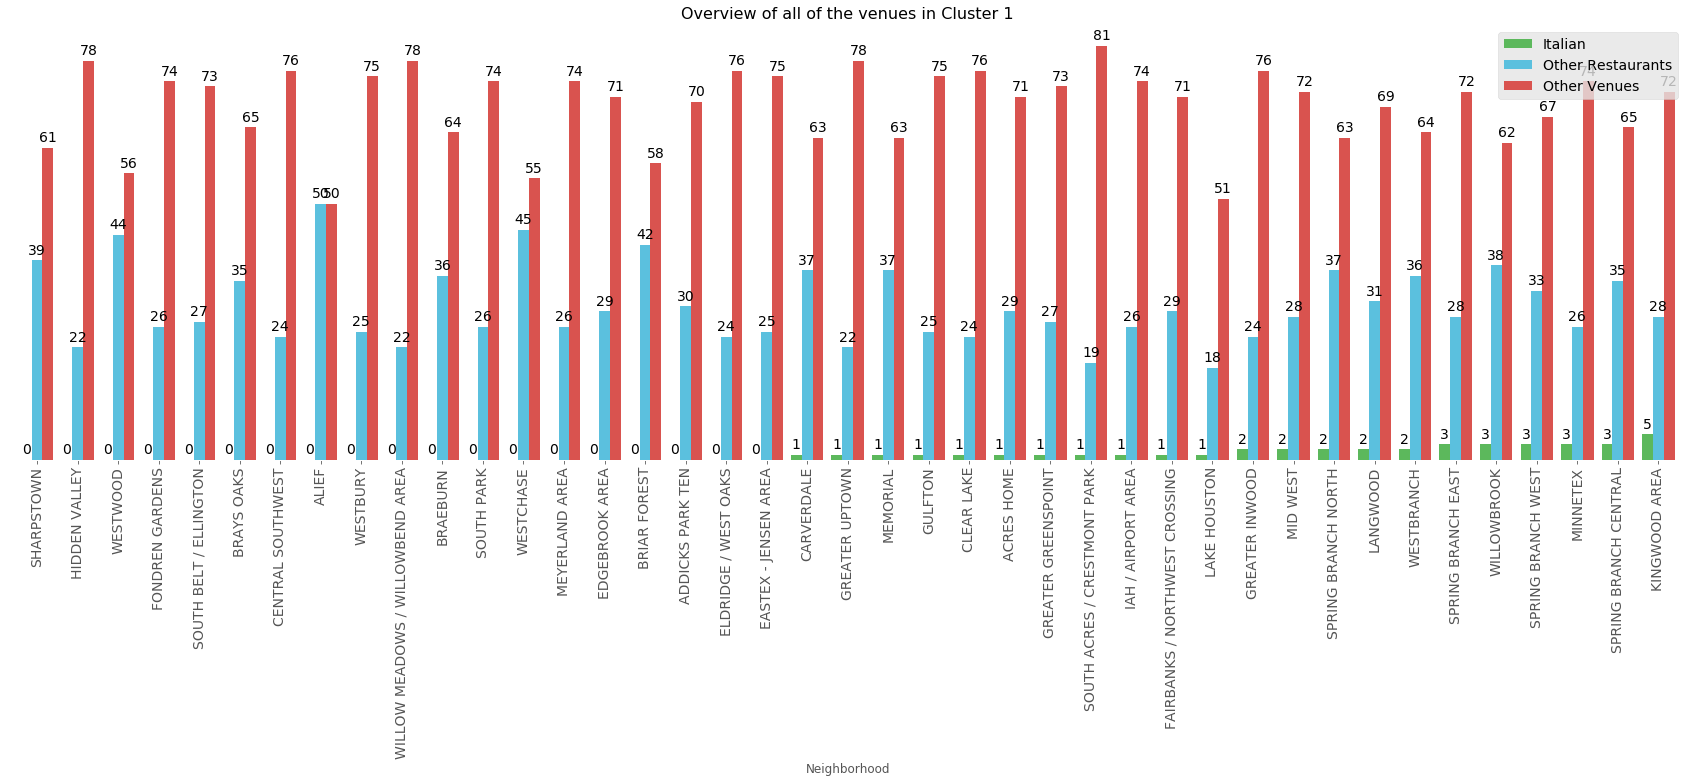

In [93]:
COH_mod = COH_metrics.drop(columns=['Radius', 'Latitude', "Longitude", "sum", "Italian percent"])
COH_mod.reset_index(drop=True, inplace=True)
COH_merged = pd.merge(left=COH_mod, right=Houston_merged, how='left', left_on='Neighborhood', right_on='Neighborhood')
c1 = COH_merged[COH_merged['Cluster Labels'] == 0]
c1 = c1.drop(columns=['Cluster Labels'])
c1.reset_index(drop=True, inplace=True)
c1.set_index('Neighborhood', inplace=True)
ax = c1.plot(kind='bar', figsize = (30,8), width = 0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize = 14)
plt.legend(labels=c1.columns,fontsize= 14)
plt.title("Overview of all of the venues in Cluster 1",fontsize= 16)
ax.set_facecolor((1.0, 1.0, 1.0))
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )

plt.show()

In [68]:
Houston_merged.loc[Houston_merged['Cluster Labels'] == 0]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,GREATER UPTOWN,0,Burger Joint,Hotel,Grocery Store,Café,Shopping Mall,New American Restaurant,American Restaurant,Chinese Restaurant,Park,Liquor Store
5,GREATER INWOOD,0,Burger Joint,Coffee Shop,Mexican Restaurant,BBQ Joint,Cajun / Creole Restaurant,Fast Food Restaurant,Sandwich Place,Seafood Restaurant,Pharmacy,Donut Shop
8,ELDRIDGE / WEST OAKS,0,Grocery Store,Burger Joint,Mexican Restaurant,Park,Fast Food Restaurant,Liquor Store,Bookstore,Coffee Shop,Sandwich Place,Bar
17,MINNETEX,0,Mexican Restaurant,Burger Joint,Fast Food Restaurant,Coffee Shop,Grocery Store,Discount Store,Park,BBQ Joint,Italian Restaurant,Fried Chicken Joint
19,SPRING BRANCH EAST,0,Coffee Shop,Mexican Restaurant,Grocery Store,Park,Trail,Fast Food Restaurant,Burger Joint,Gym,American Restaurant,Italian Restaurant
20,SPRING BRANCH NORTH,0,American Restaurant,Seafood Restaurant,Cajun / Creole Restaurant,Shopping Mall,Mexican Restaurant,Steakhouse,Coffee Shop,Burger Joint,Bakery,BBQ Joint
22,SPRING BRANCH CENTRAL,0,Burger Joint,Seafood Restaurant,Mexican Restaurant,Shopping Mall,Vietnamese Restaurant,American Restaurant,Italian Restaurant,Supermarket,Cajun / Creole Restaurant,Coffee Shop
25,LANGWOOD,0,Coffee Shop,Mexican Restaurant,Vietnamese Restaurant,Burger Joint,Cajun / Creole Restaurant,BBQ Joint,Fast Food Restaurant,Health & Beauty Service,Gym,Pizza Place
29,CARVERDALE,0,Burger Joint,Mexican Restaurant,Supermarket,Vietnamese Restaurant,Cajun / Creole Restaurant,Fast Food Restaurant,Seafood Restaurant,Park,Coffee Shop,Pharmacy
30,EASTEX - JENSEN AREA,0,Mexican Restaurant,Burger Joint,Coffee Shop,Grocery Store,Food Truck,Donut Shop,Seafood Restaurant,Beer Garden,American Restaurant,Pharmacy


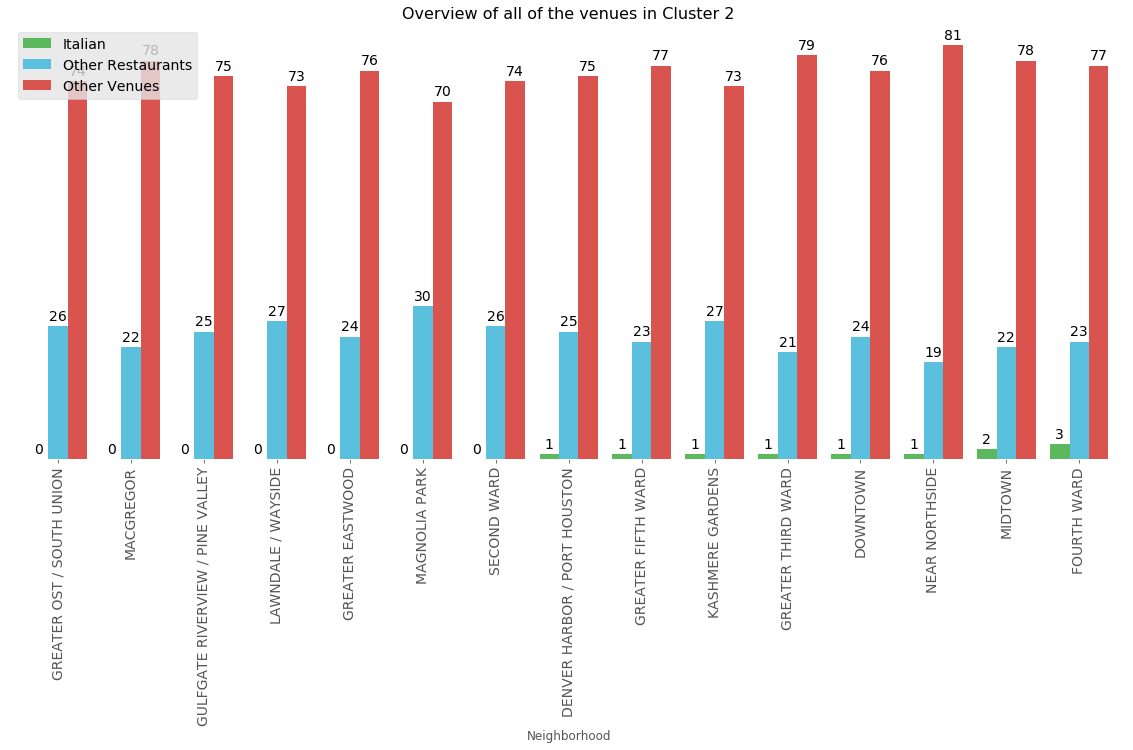

In [97]:
c2 = COH_merged[COH_merged['Cluster Labels'] == 1]
c2 = c2.drop(columns=['Cluster Labels'])
c2.reset_index(drop=True, inplace=True)
c2.set_index('Neighborhood', inplace=True)
ax = c2.plot(kind='bar', figsize = (20,8), width = 0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize = 14)
plt.legend(labels=c1.columns,fontsize= 14)
plt.title("Overview of all of the venues in Cluster 2",fontsize= 16)
ax.set_facecolor((1.0, 1.0, 1.0))
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )

plt.show()

In [69]:
Houston_merged.loc[Houston_merged['Cluster Labels'] == 1]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,FOURTH WARD,1,Coffee Shop,Park,American Restaurant,Grocery Store,Mexican Restaurant,Trail,Baseball Stadium,Taco Place,Italian Restaurant,New American Restaurant
1,SECOND WARD,1,Park,Coffee Shop,Vietnamese Restaurant,Brewery,Mexican Restaurant,Bar,Sushi Restaurant,Trail,Burger Joint,Theater
2,DOWNTOWN,1,Coffee Shop,Park,Mexican Restaurant,American Restaurant,Baseball Stadium,Burger Joint,Brewery,Trail,Beer Garden,Concert Hall
10,GREATER FIFTH WARD,1,Park,Coffee Shop,Mexican Restaurant,Brewery,Vietnamese Restaurant,Beer Garden,Baseball Stadium,Bar,Burger Joint,Theater
11,DENVER HARBOR / PORT HOUSTON,1,Mexican Restaurant,Coffee Shop,Park,Bar,Baseball Stadium,Burger Joint,Beer Garden,American Restaurant,Music Venue,Hotel
16,KASHMERE GARDENS,1,Mexican Restaurant,Brewery,Coffee Shop,American Restaurant,Beer Garden,Park,Baseball Stadium,BBQ Joint,Cajun / Creole Restaurant,Fast Food Restaurant
18,NEAR NORTHSIDE,1,Park,Coffee Shop,Mexican Restaurant,Beer Garden,Café,Brewery,American Restaurant,Baseball Stadium,Trail,Music Venue
61,GREATER OST / SOUTH UNION,1,Park,Vietnamese Restaurant,Coffee Shop,Hotel,Bar,American Restaurant,Art Museum,Trail,Sushi Restaurant,Burger Joint
66,MACGREGOR,1,Park,Trail,Mexican Restaurant,Coffee Shop,Hotel,Baseball Stadium,Bar,Theater,Burger Joint,Vietnamese Restaurant
67,GULFGATE RIVERVIEW / PINE VALLEY,1,Mexican Restaurant,Park,Vietnamese Restaurant,Burger Joint,Breakfast Spot,Bar,Theater,Baseball Stadium,Hotel,Bakery


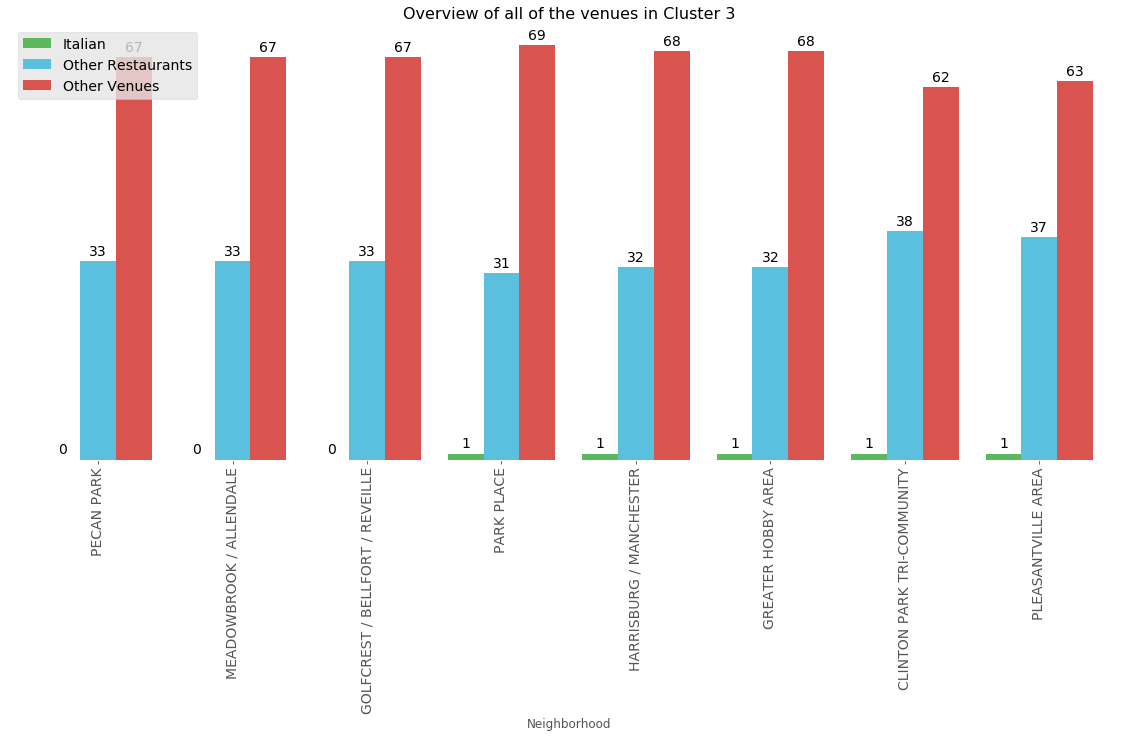

In [98]:
c3 = COH_merged[COH_merged['Cluster Labels'] == 2]
c3 = c3.drop(columns=['Cluster Labels'])
c3.reset_index(drop=True, inplace=True)
c3.set_index('Neighborhood', inplace=True)
ax = c3.plot(kind='bar', figsize = (20,8), width = 0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize = 14)
plt.legend(labels=c1.columns,fontsize= 14)
plt.title("Overview of all of the venues in Cluster 3",fontsize= 16)
ax.set_facecolor((1.0, 1.0, 1.0))
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )

plt.show()

In [70]:
Houston_merged.loc[Houston_merged['Cluster Labels'] == 2]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,CLINTON PARK TRI-COMMUNITY,2,Mexican Restaurant,Bakery,Park,BBQ Joint,Music Venue,Wings Joint,Diner,Snack Place,American Restaurant,Pharmacy
6,GREATER HOBBY AREA,2,Mexican Restaurant,Burger Joint,Vietnamese Restaurant,Fast Food Restaurant,Pizza Place,Breakfast Spot,BBQ Joint,Cajun / Creole Restaurant,Coffee Shop,Bakery
7,GOLFCREST / BELLFORT / REVEILLE,2,Mexican Restaurant,Burger Joint,Seafood Restaurant,Fast Food Restaurant,Park,Pharmacy,Cajun / Creole Restaurant,Bakery,Restaurant,BBQ Joint
12,PLEASANTVILLE AREA,2,Mexican Restaurant,Pharmacy,American Restaurant,Fried Chicken Joint,BBQ Joint,Sandwich Place,Seafood Restaurant,Brewery,Snack Place,Music Venue
53,PECAN PARK,2,Mexican Restaurant,Pharmacy,Burger Joint,Fast Food Restaurant,Bakery,Wings Joint,Pizza Place,Chinese Restaurant,Cajun / Creole Restaurant,Seafood Restaurant
62,PARK PLACE,2,Mexican Restaurant,Burger Joint,Bakery,Park,Snack Place,Wings Joint,Seafood Restaurant,Cajun / Creole Restaurant,Fast Food Restaurant,Pharmacy
63,MEADOWBROOK / ALLENDALE,2,Mexican Restaurant,Burger Joint,Pharmacy,Park,Bakery,Cajun / Creole Restaurant,Seafood Restaurant,Snack Place,Chinese Restaurant,Fast Food Restaurant
68,HARRISBURG / MANCHESTER,2,Mexican Restaurant,Park,Pharmacy,Convenience Store,Bakery,Seafood Restaurant,Snack Place,Fast Food Restaurant,BBQ Joint,Cajun / Creole Restaurant


**CLUSTER 4**
___

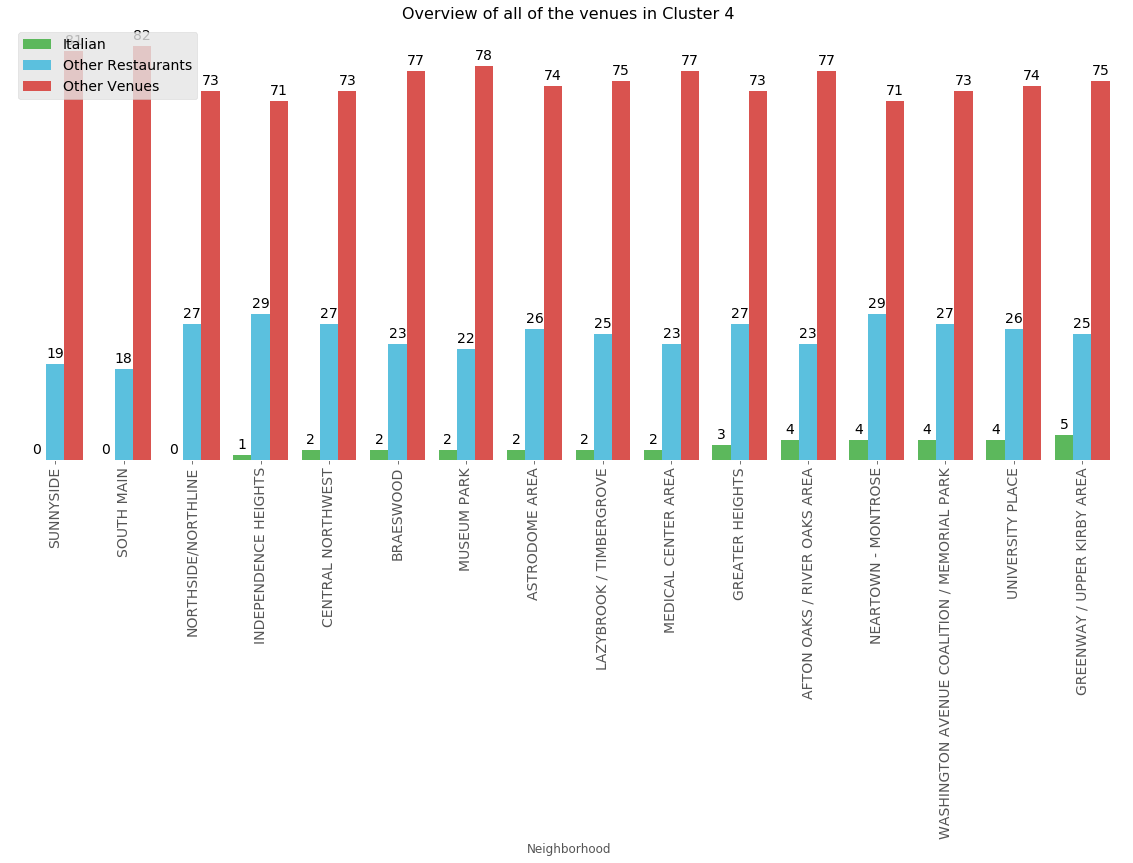

In [100]:
c4 = COH_merged[COH_merged['Cluster Labels'] == 3]
c4 = c4.drop(columns=['Cluster Labels'])
c4.reset_index(drop=True, inplace=True)
c4.set_index('Neighborhood', inplace=True)
ax = c4.plot(kind='bar', figsize = (20,8), width = 0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize = 14)
plt.legend(labels=c1.columns,fontsize= 14)
plt.title("Overview of all of the venues in Cluster 4",fontsize= 16)
ax.set_facecolor((1.0, 1.0, 1.0))
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )

plt.show()

In [71]:
Houston_merged.loc[Houston_merged['Cluster Labels'] == 3]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,WASHINGTON AVENUE COALITION / MEMORIAL PARK,3,Trail,Coffee Shop,Grocery Store,Italian Restaurant,Park,New American Restaurant,American Restaurant,Mexican Restaurant,Taco Place,Liquor Store
14,LAZYBROOK / TIMBERGROVE,3,Trail,Coffee Shop,New American Restaurant,Taco Place,American Restaurant,Pizza Place,Gym,Mexican Restaurant,Beer Garden,Restaurant
15,GREATER HEIGHTS,3,Coffee Shop,Park,Grocery Store,Mexican Restaurant,American Restaurant,Burger Joint,Trail,Italian Restaurant,New American Restaurant,Pizza Place
26,INDEPENDENCE HEIGHTS,3,Mexican Restaurant,American Restaurant,Coffee Shop,Burger Joint,Beer Garden,Donut Shop,BBQ Joint,Restaurant,Taco Place,Trail
27,CENTRAL NORTHWEST,3,Coffee Shop,Pizza Place,Burger Joint,Fast Food Restaurant,Park,Trail,Mexican Restaurant,BBQ Joint,Taco Place,Beer Garden
33,NORTHSIDE/NORTHLINE,3,Mexican Restaurant,Beer Garden,BBQ Joint,Coffee Shop,Burger Joint,Fast Food Restaurant,Wine Bar,Restaurant,Brewery,American Restaurant
51,SUNNYSIDE,3,Zoo Exhibit,Park,Burger Joint,Trail,Science Museum,Food Truck,Southern / Soul Food Restaurant,Mexican Restaurant,American Restaurant,BBQ Joint
58,SOUTH MAIN,3,Zoo Exhibit,Trail,Burger Joint,Science Museum,Mexican Restaurant,Park,Grocery Store,Ice Cream Shop,Golf Course,Garden
60,ASTRODOME AREA,3,Park,Grocery Store,Trail,Coffee Shop,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,BBQ Joint
64,MEDICAL CENTER AREA,3,Park,Burger Joint,Coffee Shop,Grocery Store,Trail,New American Restaurant,Breakfast Spot,Mexican Restaurant,Italian Restaurant,Café


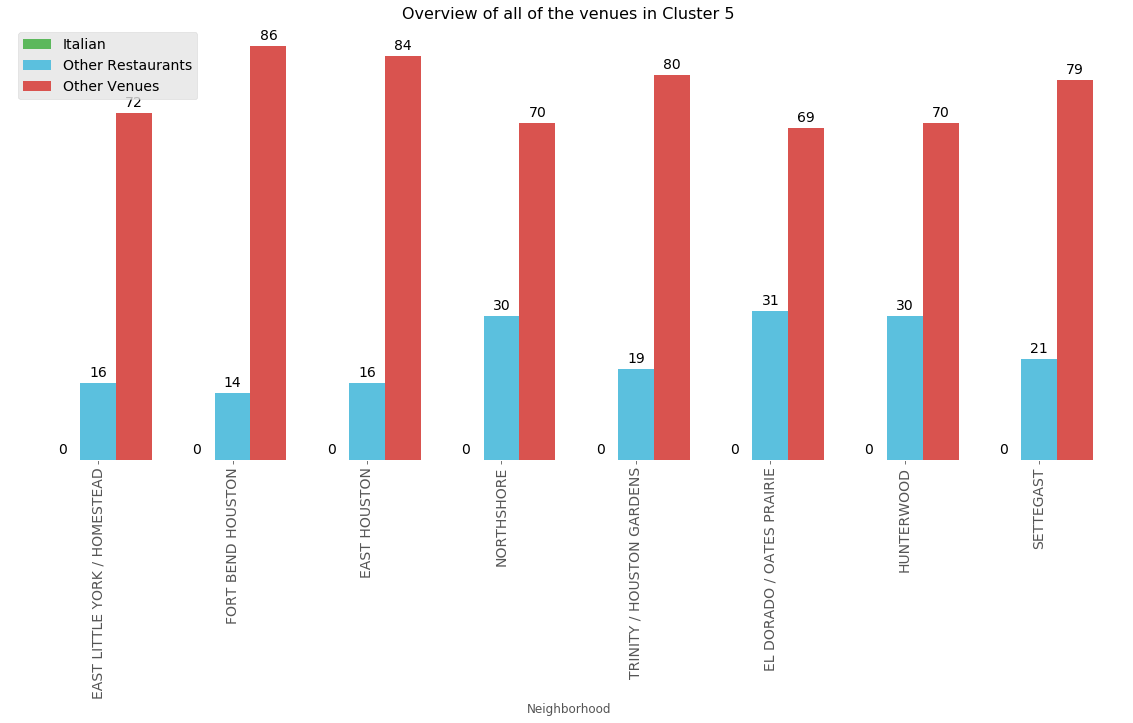

In [101]:
c5 = COH_merged[COH_merged['Cluster Labels'] == 4]
c5 = c5.drop(columns=['Cluster Labels'])
c5.reset_index(drop=True, inplace=True)
c5.set_index('Neighborhood', inplace=True)
ax = c5.plot(kind='bar', figsize = (20,8), width = 0.8, color = ('#5cb85c','#5bc0de','#d9534f'), fontsize = 14)
plt.legend(labels=c1.columns,fontsize= 14)
plt.title("Overview of all of the venues in Cluster 5",fontsize= 16)
ax.set_facecolor((1.0, 1.0, 1.0))
y_axis = ax.axes.get_yaxis()
y_axis.set_visible(False)

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2),
                (p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0,10),
                textcoords='offset points',
                fontsize=14
               )

plt.show()

In [72]:
Houston_merged.loc[Houston_merged['Cluster Labels'] == 4]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,NORTHSHORE,4,Mexican Restaurant,Discount Store,Fried Chicken Joint,Sandwich Place,Seafood Restaurant,Ice Cream Shop,Burger Joint,Pizza Place,Department Store,American Restaurant
21,EL DORADO / OATES PRAIRIE,4,Mexican Restaurant,Discount Store,Sandwich Place,Pizza Place,Seafood Restaurant,Fried Chicken Joint,Ice Cream Shop,Pharmacy,Burger Joint,Chinese Restaurant
23,HUNTERWOOD,4,Mexican Restaurant,Discount Store,Seafood Restaurant,Pizza Place,Pharmacy,Sandwich Place,Ice Cream Shop,Fried Chicken Joint,Department Store,Burger Joint
24,SETTEGAST,4,Discount Store,Mexican Restaurant,Sandwich Place,Fried Chicken Joint,Pizza Place,Pharmacy,Fast Food Restaurant,Grocery Store,Seafood Restaurant,Burger Joint
28,TRINITY / HOUSTON GARDENS,4,Discount Store,Mexican Restaurant,Sandwich Place,Fried Chicken Joint,Burger Joint,Fast Food Restaurant,Brewery,Ice Cream Shop,BBQ Joint,Pharmacy
31,EAST HOUSTON,4,Discount Store,Sandwich Place,Fast Food Restaurant,Mexican Restaurant,Fried Chicken Joint,Pizza Place,Pharmacy,Gas Station,Brewery,Burger Joint
35,EAST LITTLE YORK / HOMESTEAD,4,Discount Store,Fast Food Restaurant,Fried Chicken Joint,Sandwich Place,Pharmacy,Mexican Restaurant,Gas Station,Burger Joint,Pizza Place,Park
45,FORT BEND HOUSTON,4,Sandwich Place,Pharmacy,Burger Joint,Grocery Store,Donut Shop,Pizza Place,Discount Store,Fried Chicken Joint,Fast Food Restaurant,Park


In [104]:
c4

,Italian,Other Restaurants,Other Venues,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,
SUNNYSIDE,0,19,81,Zoo Exhibit,Park,Burger Joint,Trail,Science Museum,Food Truck,Southern / Soul Food Restaurant,Mexican Restaurant,American Restaurant,BBQ Joint
SOUTH MAIN,0,18,82,Zoo Exhibit,Trail,Burger Joint,Science Museum,Mexican Restaurant,Park,Grocery Store,Ice Cream Shop,Golf Course,Garden
NORTHSIDE/NORTHLINE,0,27,73,Mexican Restaurant,Beer Garden,BBQ Joint,Coffee Shop,Burger Joint,Fast Food Restaurant,Wine Bar,Restaurant,Brewery,American Restaurant
INDEPENDENCE HEIGHTS,1,29,71,Mexican Restaurant,American Restaurant,Coffee Shop,Burger Joint,Beer Garden,Donut Shop,BBQ Joint,Restaurant,Taco Place,Trail
CENTRAL NORTHWEST,2,27,73,Coffee Shop,Pizza Place,Burger Joint,Fast Food Restaurant,Park,Trail,Mexican Restaurant,BBQ Joint,Taco Place,Beer Garden
BRAESWOOD,2,23,77,Zoo Exhibit,Burger Joint,Grocery Store,Mexican Restaurant,Café,Trail,Sushi Restaurant,New American Restaurant,Park,Science Museum
MUSEUM PARK,2,22,78,Park,Coffee Shop,Burger Joint,Grocery Store,Trail,Mexican Restaurant,Breakfast Spot,Café,Italian Restaurant,Food Truck
ASTRODOME AREA,2,26,74,Park,Grocery Store,Trail,Coffee Shop,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Fast Food Restaurant,Italian Restaurant,BBQ Joint
LAZYBROOK / TIMBERGROVE,2,25,75,Trail,Coffee Shop,New American Restaurant,Taco Place,American Restaurant,Pizza Place,Gym,Mexican Restaurant,Beer Garden,Restaurant
